<a href="https://colab.research.google.com/github/pavan-kumar96/New-projects/blob/main/carbage_v_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!unzip /content/drive/MyDrive/Data_scientist_data/garbage_classification_dataset.zip


Archive:  /content/drive/MyDrive/Data_scientist_data/garbage_classification_dataset.zip
   creating: TEST/
  inflating: TEST/037.jpg            
  inflating: TEST/205.jpg            
  inflating: TEST/143.jpg            
  inflating: TEST/188.jpg            
  inflating: TEST/057.jpg            
  inflating: TEST/277.jpg            
  inflating: TEST/266.jpg            
  inflating: TEST/081.jpg            
  inflating: TEST/250.jpg            
  inflating: TEST/068.jpg            
  inflating: TEST/019.jpg            
  inflating: TEST/133.jpg            
  inflating: TEST/017.jpg            
  inflating: TEST/288.jpg            
  inflating: TEST/166.jpg            
  inflating: TEST/263.jpg            
  inflating: TEST/177.jpg            
  inflating: TEST/149.jpg            
  inflating: TEST/197.jpg            
  inflating: TEST/112.jpg            
  inflating: TEST/087.jpg            
  inflating: TEST/105.jpg            
  inflating: TEST/189.jpg            
  inflating: TEST/2

# EDA

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [4]:
train_data = []
for cat in os.listdir('/content/TRAIN'):
  cat_cat = cat
  for i in os.listdir(os.path.join('/content/TRAIN',cat)):
    img = cv2.imread(os.path.join('/content/TRAIN',cat, i))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # img = cv2.resize(100,100,3)
    train_data.append((img,cat))

    

  

In [5]:
import pandas as pd


In [6]:
# converting the list into dataframe
data = pd.DataFrame(train_data, columns = ['feature', "target"])

In [7]:
data

,feature,target
0,"[[[225, 208, 192], [225, 208, 192], [225, 208,...",trash
1,"[[[218, 190, 179], [218, 190, 179], [218, 190,...",trash
2,"[[[188, 172, 157], [188, 172, 157], [187, 171,...",trash
3,"[[[237, 223, 214], [237, 223, 214], [237, 223,...",trash
4,"[[[172, 139, 130], [172, 139, 130], [172, 139,...",trash
...,...,...
1996,"[[[219, 221, 234], [219, 221, 234], [219, 221,...",plastic
1997,"[[[221, 223, 236], [221, 223, 236], [221, 223,...",plastic
1998,"[[[204, 206, 219], [204, 206, 219], [204, 206,...",plastic
1999,"[[[236, 235, 233], [236, 235, 233], [236, 235,...",plastic


In [8]:
#scaling the data
train_x = np.array(data['feature']/255)

# Insights of data

In [9]:
# Total number of images
len(data)

2001

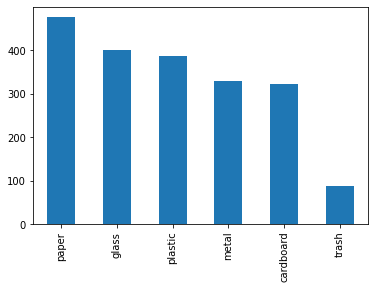

In [10]:
### different categories with count and visulization
data.target.value_counts().plot(kind ='bar')

In [11]:
data.target.value_counts()

paper        476
glass        401
plastic      386
metal        328
cardboard    323
trash         87
Name: target, dtype: int64

In [12]:
# train_x = []
# train_y = []
# for feature, label in train_data:
#    train_x.append(feature)
#    train_y.append(label)


# # converting list to array



# # Normalization or scalling






In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

In [14]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/TRAIN'
valid_path = '/content/TEST'

In [15]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.2)  # val 20%

val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# train_datagen = ImageDataGenerator(rescale = 1./255,
#                                    shear_range = 0.2,
#                                    zoom_range = 0.2,
#                                    horizontal_flip = True)

# test_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:

# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/TRAIN',
                                                
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 subset = 'training')

validation_set = train_datagen.flow_from_directory('/content/TRAIN',
                                                
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 subset = 'validation')



Found 1603 images belonging to 6 classes.
Found 398 images belonging to 6 classes.


In [17]:
import os
import matplotlib.pyplot as plt
import cv2

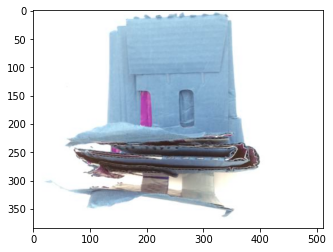

In [18]:
for img in os.listdir('/content/TEST'):
  imm = cv2.imread(os.path.join('/content/TEST',img))
  plt.imshow(imm)
  
  # plt.imshow(imm)



In [19]:

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense,Flatten,GlobalAveragePooling2D , Dropout
from tensorflow import keras

import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [20]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 1s 0us/step


In [21]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [22]:
## Building the model
def create_model(outputs, units):
  model = Sequential()
  model.add(inception)
  model.add(GlobalAveragePooling2D())
  model.add(Flatten())
  # model.add(Dense(units , activation = 'relu'))
  model.add(Dense(300, activation='relu', bias_regularizer=keras.regularizers.L1L2(l1=0.01, l2=0.001)))
  model.add(Dropout(0.2))
  model.add(Dense(100, activation='relu', bias_regularizer=keras.regularizers.L1L2(l1=0.01, l2=0.001))) 
  model.add(Dense(outputs , activation = 'softmax'))


  
  return model

In [23]:
# our layers - you can add more if you want
# x = Flatten()(inception.output)

In [24]:
# prediction = Dense(6, activation='softmax')(x)
# # 
# # create a model object
# model = Model(inputs=inception.input, outputs=prediction)

In [25]:
### Rm compiler
model = create_model(6,512)
opt = RMSprop(lr = 1e-4 , rho = 0.9, epsilon = None , decay = 0.0)


#compiling the model
model.compile(optimizer= opt, metrics= ['accuracy'], loss= 'categorical_crossentropy')

erst = EarlyStopping(monitor= 'val_loss', patience=3, restore_best_weights= True)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [29]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',np.unique(training_set.classes), training_set.classes)
class_weights = dict(enumerate(class_weights))

In [30]:
class_weights

{0: 1.0315315315315314,
 1: 0.832294911734164,
 2: 1.0158428390367553,
 3: 0.7012248468941382,
 4: 0.8646170442286947,
 5: 3.816666666666667}

In [31]:

# fit the model
# Run the cell. It will take some time to execute
history = model.fit(
  training_set,
  validation_data=validation_set,
  epochs=20,
  class_weight = class_weights,
  steps_per_epoch=len(training_set),
  validation_steps=len(validation_set),
  callbacks = [erst]
)




Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Epoch 1/20
51/51 [==============================] - 240s 5s/step - loss: 1.4949 - accuracy: 0.4454 - val_loss: 1.0561 - val_accuracy: 0.6558
Epoch 2/20
51/51 [==============================] - 231s 5s/step - loss: 1.0395 - accuracy: 0.6519 - val_loss: 0.8970 - val_accuracy: 0.6809
Epoch 3/20
51/51 [==============================] - 231s 5s/step - loss: 0.8474 - accuracy: 0.7230 - val_loss: 0.7654 - val_accuracy: 0.7236
Epoch 4/20
51/51 [==============================] - 232s 5s/step - loss: 0.7695 - accuracy: 0.7361 - val_loss: 0.7816 - val_accuracy: 0.7161
Epoch 5/20
51/51 [==============================] - 235s 5s/step - loss: 0.6799 - accuracy: 0.7430 - val_loss: 0.7854 - val_accuracy: 0.7136
Epoch 6/20
51/51 [==============================] - 234s 5s/step - loss: 0.6463 - accuracy: 0.7748 - val_loss: 0.7649 - val_accuracy: 0.7462
Epoch 7/20
51/51

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


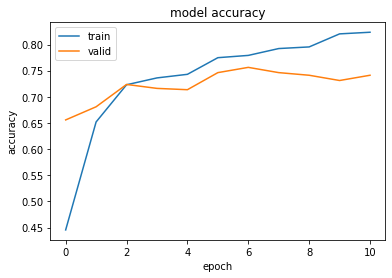

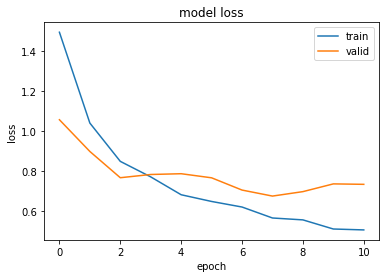

In [32]:
print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

In [33]:

# test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
img_size = (224,224)
batch_size = 32
test_flow = val_datagen.flow_from_directory(
    '/content/TRAIN',
    shuffle=False,
    target_size=img_size,
    batch_size = batch_size,
    subset = 'validation'
)

import math


predictions = model.predict_generator(
    test_flow,
    verbose=1,
    steps=math.ceil(test_flow.samples/test_flow.batch_size))

predicted_classes = np.argmax(predictions, axis=1) 

Found 398 images belonging to 6 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


13/13 [==============================] - 43s 3s/step


In [34]:
true_classes = test_flow.classes
class_labels = list(test_flow.class_indices.keys())  


In [35]:
from sklearn.metrics import classification_report
report = classification_report(
    true_classes,
    predicted_classes,
    target_names=class_labels)
print(report)

              precision    recall  f1-score   support

   cardboard       0.80      0.83      0.82        64
       glass       0.80      0.70      0.75        80
       metal       0.79      0.69      0.74        65
       paper       0.78      0.82      0.80        95
     plastic       0.72      0.82      0.76        77
       trash       0.47      0.47      0.47        17

    accuracy                           0.76       398
   macro avg       0.73      0.72      0.72       398
weighted avg       0.76      0.76      0.76       398



In [36]:
from sklearn.metrics import confusion_matrix

ce = confusion_matrix(true_classes, predicted_classes)

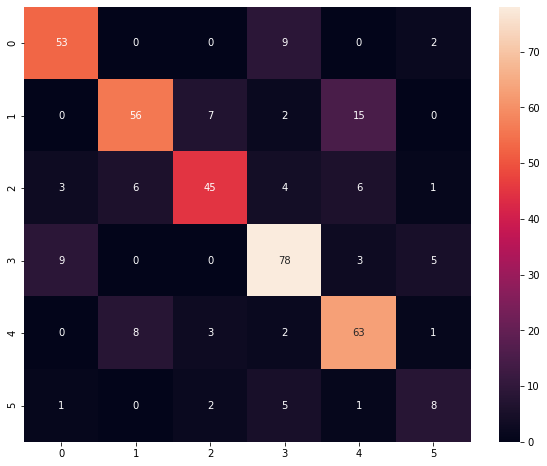

In [37]:
import seaborn as sns
plt.figure(figsize=(10,8))

sns.heatmap(ce,annot = True)